In [163]:
import os, sys, scipy
import math, glob
import numpy as np
import subprocess
import matplotlib.pyplot as plt
import pandas as pd
    

In [164]:
import scienceplots

In [165]:
def get_pressure_lammps(filename, start=0, end=-1, nskip=10, debug=False):
# def get_pressure_lammps(filename, nskip=10, debug=False):
    """
        This function reads running_md.log (default filename)
        from molecular dynamics calculation.

        It forms a numpy array of size: niteration rows x 2 columns
        data[:,0] : the first column is iteration number
        data[:,1] : the second column is the total pressure (ionic + electronic)
    """
    with open(filename) as f:
        lines = f.readlines()

    step_indices = [i for i, line in enumerate(lines) if line.strip().startswith("Step")]
    loop_indices = [i for i, line in enumerate(lines) if "Loop time" in line]

    # if len(step_indices) < 2 or len(loop_indices) < 2:
    #     print("Not enough 'Step' or 'Loop time' entries found.")
    #     return

    start_idx = step_indices[0] +1
    # Find the first loop time after second Step
    end_idx = next(i for i in loop_indices if i > start_idx)

    # for line in lines[start_idx:end_idx + 1]:
    #     print(line, end='')
        

    nlines=end_idx - start_idx - 2
    data = np.zeros((nlines,2))
    if debug:
        print("nlines = ", nlines)
    # # data = np.zeros((nlines,2), dtype=dtype )
    for i in range(nlines):
        data[i, 0] = int(i)
        # if debug:
        #     # print(relevant_lines[i].split())
        #     print("number of lines: ",  int(nlines))
        data[i, 1] = float(lines[i+start_idx].split()[2])

    # after the data is extracted, get the average and standard deviation
    avg = np.mean(data[start:end, 1], axis=0)
    std = np.std(data[start:end:, 1], axis=0)
    return float(avg), float(std)

In [166]:
# get_pressure_lammps("./0.5-4000/log.lammps", start=0)

In [167]:
def pressure_nist_fit(T):
    # T in K, P in bar
    A = 5.73623
    B = 13204.109
    C = -24.306
    # T range 1557 to 2329
    return A-(B/(T+C))

In [168]:
press_data = np.loadtxt("../PROD/0.6-4000/ave.lammps", skiprows=2)
press = press_data[:,4]
np.mean(press)

np.float64(61.053021400000006)

In [169]:
def get_saturation_press(file):
    press_data = np.loadtxt(file, skiprows=2)
    avg = np.mean(press_data[:,4])
    std = np.std(press_data[:,4])
    return avg, std

In [170]:
nist_T = np.linspace(1557, 2329, 100)
# nist_T

In [171]:
import glob

In [172]:
files = sorted(glob.glob("../PROD/*/ave.lammps"))
files = files[:-1]
files

['../PROD/0.6-3500/ave.lammps',
 '../PROD/0.6-3750/ave.lammps',
 '../PROD/0.6-4000/ave.lammps',
 '../PROD/0.6-4250/ave.lammps',
 '../PROD/0.6-4500/ave.lammps',
 '../PROD/0.6-4750/ave.lammps',
 '../PROD/0.6-5000/ave.lammps',
 '../PROD/0.6-5250/ave.lammps',
 '../PROD/0.6-5500/ave.lammps',
 '../PROD/0.6-5750/ave.lammps']

In [173]:
outfile=open("clausius_clapeyron.csv", "w")
# outfile.write("1/T(K),P(kbar),Perr(kbar)\n")
outfile.write("T(K),P(kbar),Perr(kbar)\n")

24

In [174]:
for file in files:
    T = file.split("/")[2].split("-")[1]
    # filename= os.path.join("./", str(rho)+'-'+str(T), 'ave.lammps')
    # avg, std = get_pressure_lammps(filename, start=90)
    avg, std = get_saturation_press(file)
    # print("%d,%.2f,%.3f,%.3f" % (T,  rho, avg, std) )
    # outfile.write("%.8e,%.4f,%.4f\n" % (1.0/T, avg/1e3, std/1e3))
    outfile.write("%s,%.4f,%.4f\n" % (T, avg/1e3, std/1e3))
outfile.close()

In [175]:
# # RHOLIST=[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.4]
# RHOLIST=[0.5]
# TLIST=[4000+i*125 for i in range(13)]

# # TLIST = [4000,4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000]


# outfile=open("clausius_clapeyron.csv", "w")
# # outfile.write("1/T(K),P(kbar),Perr(kbar)\n")
# outfile.write("T(K),P(kbar),Perr(kbar)\n")

# for T in TLIST:
#     for rho in RHOLIST:
#         filename= os.path.join("./", str(rho)+'-'+str(T), 'ave.lammps')
#         # avg, std = get_pressure_lammps(filename, start=90)
#         avg, std = get_saturation_press(filename)
#         # print("%d,%.2f,%.3f,%.3f" % (T,  rho, avg, std) )
#         # outfile.write("%.8e,%.4f,%.4f\n" % (1.0/T, avg/1e3, std/1e3))
#         outfile.write("%d,%.4f,%.4f\n" % (T, avg/1e3, std/1e3))
# outfile.close()


In [176]:
df = pd.read_csv("clausius_clapeyron.csv")
# df

In [177]:
bar2atm = 0.986923

In [178]:
# pressure_nist_fit(nist_T)

In [179]:
full_T = np.linspace(1500, 6000, 100)

In [180]:
expdata = np.loadtxt('cc.dat')
# expdata

## Use ideal gas law to get vapor pressure 

In [181]:
density_files = sorted( glob.glob("../PROD/*/density_filter.dat") )
density_files = density_files[:-3]
# files = files[:-2]
density_files

['../PROD/0.6-3500/density_filter.dat',
 '../PROD/0.6-3750/density_filter.dat',
 '../PROD/0.6-4000/density_filter.dat',
 '../PROD/0.6-4250/density_filter.dat',
 '../PROD/0.6-4500/density_filter.dat',
 '../PROD/0.6-4750/density_filter.dat',
 '../PROD/0.6-5000/density_filter.dat',
 '../PROD/0.6-5250/density_filter.dat']

In [182]:
result= []
for file in density_files:
    temp = file.split('/')[2].split('-')[1]
    # print(temp)
    data = list(np.loadtxt(file))
    line = [temp] + [ i for i in data]
    result.append(line)
final= np.array(result, dtype=np.float32)
np.savetxt("coexistence.dat", final)

In [183]:
T = final[:,0]
rho_l = final[:,1]
rho_l_err = final[:, 2]
rho_v = final[:, 3]
rho_v_err = final[:, 4]

In [184]:
# Prepare data
delta_rho = rho_l - rho_v
avg_rho = 0.5 * (rho_l + rho_v)

In [185]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# === Your input data ===
T = final[:,0]
rho_l = final[:,1]
err_l = final[:, 2]
rho_v = final[:, 3]
err_v = final[:, 4]


# === Fixed critical exponent ===
beta_fixed = 0.326

# Coexistence scaling law with fixed beta
def scaling_law_fixed_beta(T, Tc, A):
    return A * (Tc - T)**beta_fixed

# Rectilinear diameter law (uses Tc from first fit)
def rectilinear_diameter(T, Tc, rhoc, B):
    return rhoc + B * (Tc - T)

In [186]:
from numpy import sqrt, diag

# === Prepare data ===
delta_rho = rho_l - rho_v
avg_rho = 0.5 * (rho_l + rho_v)
delta_rho_err = np.sqrt(err_l**2 + err_v**2)
avg_rho_err = 0.5 * np.sqrt(err_l**2 + err_v**2)

# Fit scaling law
popt_diff, pcov_diff = curve_fit(scaling_law_fixed_beta, T, delta_rho, p0=[max(T) + 1, 1.0])
Tc_fit, A_fit = popt_diff

# Fit rectilinear diameter with Tc fixed
popt_avg, pcov_avg = curve_fit(lambda T, rhoc, B: rectilinear_diameter(T, Tc_fit, rhoc, B), T, avg_rho, p0=[avg_rho[-1], 1.0])
rhoc_fit, B_fit = popt_avg

# Uncertainties from fit covariance matrices
Tc_err = sqrt(pcov_diff[0, 0])      # error in Tc
A_err = sqrt(pcov_diff[1, 1])       # error in A

rhoc_err = sqrt(pcov_avg[0, 0])     # error in rhoc
B_err = sqrt(pcov_avg[1, 1])        # error in B

print(f"Tc     = {Tc_fit:.6f} ± {Tc_err:.6f}")
print(f"A      = {A_fit:.6f} ± {A_err:.6f}")
print(f"rho_c  = {rhoc_fit:.6f} ± {rhoc_err:.6f}")
print(f"B      = {B_fit:.6f} ± {B_err:.6f}")


Tc     = 6559.862365 ± 48.321588
A      = 0.126086 ± 0.000969
rho_c  = 0.596788 ± 0.006995
B      = 0.000088 ± 0.000003


In [187]:
# === Evaluate fitted density curves ===
def rho_l_fit(T):
    delta_rho = scaling_law_fixed_beta(T, Tc_fit, A_fit)
    rho_avg = rectilinear_diameter(T, Tc_fit, rhoc_fit, B_fit)
    return rho_avg + 0.5 * delta_rho

def rho_v_fit(T):
    delta_rho = scaling_law_fixed_beta(T, Tc_fit, A_fit)
    rho_avg = rectilinear_diameter(T, Tc_fit, rhoc_fit, B_fit)
    return rho_avg - 0.5 * delta_rho

finer_T = np.linspace(3250, Tc_fit, 50)
# finer_T = np.logspace(np.log(3500), np.log(Tc_fit), 100)
# === Example: compute fitted rho_l and rho_v on original T points ===
rho_l_fitted = rho_l_fit(finer_T)
rho_v_fitted = rho_v_fit(finer_T)

In [188]:
# Constants
M_Al = 26.9815               # g/mol, molar mass of Aluminum
N_A = 6.02214076e23          # 1/mol, Avogadro's number
k_B = 1.380649e-23           # J/K, Boltzmann constant
Pa_to_bar = 1e-5
Pa_to_atm = 1.0 / 101325.0

def vapor_pressure(rho_gcm3, T):
    """
    Compute vapor pressure of Al vapor from mass density and T
    using the ideal gas law.
    
    Parameters
    ----------
    rho_gcm3 : float
        Mass density [g/cm^3]
    T : float
        Temperature [K]
        
    Returns
    -------
    P_Pa, P_bar, P_atm : tuple of floats
        Pressure in Pa, bar, atm
    """
    # Number density [atoms/cm^3]
    n_cm3 = (rho_gcm3 / M_Al) * N_A
    
    # Convert to [atoms/m^3]
    n_m3 = n_cm3 * 1e6
    
    # Ideal gas law
    P_Pa = n_m3 * k_B * T
    # return P_Pa, P_Pa * Pa_to_bar, P_Pa * Pa_to_atm    
    return P_Pa * Pa_to_bar

In [189]:
rho_v_fitted

array([0.00325263, 0.00322903, 0.0032893 , 0.00343646, 0.00367369,
       0.00400437, 0.00443208, 0.00496064, 0.00559408, 0.00633673,
       0.00719321, 0.00816844, 0.00926769, 0.01049664, 0.01186137,
       0.01336844, 0.01502494, 0.01683851, 0.01881748, 0.02097087,
       0.02330852, 0.02584121, 0.02858074, 0.03154009, 0.03473363,
       0.03817724, 0.04188864, 0.0458876 , 0.05019637, 0.05484006,
       0.05984721, 0.06525043, 0.07108732, 0.07740146, 0.08424394,
       0.09167515, 0.09976732, 0.10860799, 0.11830481, 0.1289925 ,
       0.14084324, 0.15408258, 0.16901526, 0.18606927, 0.20587683,
       0.22943824, 0.25850138, 0.29664468, 0.35380422, 0.59678817])

In [190]:
vapor_pressure(rho_v_fitted, finer_T)

array([   32.5751134 ,    33.01085869,    34.31172403,    36.56210562,
          39.85081739,    44.27143477,    49.9226741 ,    56.90881225,
          65.34015187,    75.33353848,    87.01293663,   100.51007364,
         115.96516104,   133.52770521,   153.35742146,   175.62526798,
         200.51461961,   228.22260514,   258.96163722,   292.96116968,
         330.46972522,   371.75724607,   417.11783299,   466.87295396,
         521.37522501,   581.01289301,   646.21518665,   717.4587502 ,
         795.27544037,   880.26185632,   973.09109778,  1074.52742158,
        1185.44471944,  1306.85010639,  1439.914457  ,  1586.01255843,
        1746.77684893,  1924.17079703,  2120.59143572,  2339.01651942,
        2583.22246678,  2858.11946723,  3170.2907372 ,  3528.91078937,
        3947.42640616,  4446.94459234,  5064.05068649,  5873.02663794,
        7078.32704261, 12063.76940705])

In [191]:
# for file in density_files:
#     data = np.loadtxt(file)
#     T = float(file.split("/")[2].split("-")[1])
#     rho = data[1]
#     rhoerr = data[3]
#     # print("%s %f\n" %(T, data[1]))
#     T_P_data.append([T, vapor_pressure(rho, T)[1], vapor_pressure(rhoerr, T)[1]])

In [192]:
T_P_data = vapor_pressure(rho_v_fitted, finer_T)

In [193]:
TPdata = np.array(T_P_data, dtype='float')
# TPdata

In [194]:
# Coexistence scaling law with fixed beta
def August(T, B, C ):
    return  np.exp(-B/T + C)

In [195]:
def antoine_law(T, A, B, C):
    return np.exp(A - B/(T + C))

In [196]:
def dippr_law(T, A, B, C = 0.0, D=0.0, E=0.0):
    return np.exp(A + B/T + C *np.log(T) + D* T**E)

In [197]:
from scipy.optimize import curve_fit

from functools import partial

In [198]:
hultgren = np.loadtxt("Hultgren.dat")
# hultgren

In [199]:
normal_hultgren = 10**(hultgren[:,1]) # in atm

In [200]:
normal_T = 1000/hultgren[:,0] # in K

In [201]:
# Fit August law
popt, pcov = curve_fit(August, normal_T, normal_hultgren, p0=[max(normal_T) , min(normal_hultgren)])
popt

array([3.67063313e+04, 1.32128231e+01])

In [202]:
# Fit Antoine law
popt_antoine, pcov_antoine = curve_fit(antoine_law, normal_T, normal_hultgren, p0=[15, 10000, 2])
popt_antoine

array([1.75018538e+01, 6.23007680e+04, 7.83059079e+02])

In [203]:
# fixedD = 0
fixedE = 1
# partial_dippr = partial(dippr_law, D = fixedD, E=fixedE)
partial_dippr = partial(dippr_law, E=fixedE)

In [204]:
# Fit DIPPR law
popt_dippr, pcov_dippr = curve_fit(dippr_law, normal_T, normal_hultgren, p0=[10, -2e4, 1, 1e-6, 1])
# A_fit, B_fit, C_fit, D_fit, E_fit = popt_dippr

# popt_dippr, pcov_dippr = curve_fit(partial_dippr, (expdata[:,1]+273.15), expdata[:,0], p0=[2, -10000, 1, 1e-6])
popt_dippr

/tmp/ipykernel_48222/2601608517.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_dippr, pcov_dippr = curve_fit(dippr_law, normal_T, normal_hultgren, p0=[10, -2e4, 1, 1e-6, 1])


array([-4.86766876e+01, -1.86156852e+04,  6.98470287e+00, -2.40496123e-04,
       -2.25347441e+01])

In [205]:
# popt_dippr

In [206]:
expdata[:,0], np.log10(expdata[:,0])

(array([0.00133322, 0.0066661 , 0.0133322 , 0.0266644 , 0.0533288 ,
        0.0799932 , 0.133322  , 0.266644  , 0.533288  , 1.0132472 ]),
 array([-2.87509818, -2.17612818, -1.87509818, -1.57406818, -1.27303819,
        -1.09694693, -0.87509818, -0.57406818, -0.27303819,  0.00571541]))

In [207]:
npb = np.loadtxt("npb.dat")
npb

array([[ 0.49967, -2.6727 ],
       [ 0.39987, -1.06709],
       [ 0.3332 ,  0.01099],
       [ 0.24957,  1.39235]])

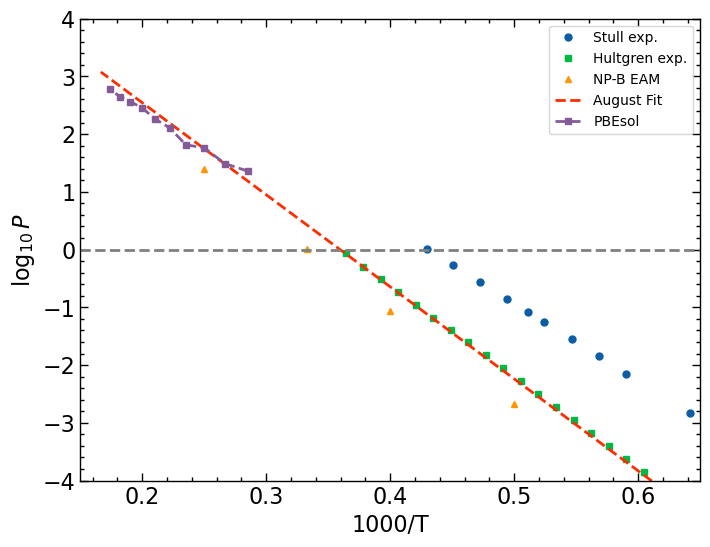

In [208]:
# plt.figure(figsize=(9, 6))

with plt.style.context(['science', 'nature','vibrant', "notebook", "scatter"]):
    T_plot = np.linspace(min(full_T), max(full_T), 200)

    fig, ins_ax = plt.subplots(1, 1, figsize=(8, 6))
    # axs.set_ylim((-100, 1000))
    # # fig.tight_layout()
    # axs.set_xlabel(r"T (K)")
    # axs.set_ylabel(r"P (bar)")
    # axs.plot(expdata[:,1]+273.15, expdata[:,0], linestyle='', markersize=5, label='Stull exp.')

    # axs.plot(1000/hultgren[:,0], 10**hultgren[:,1],  markersize=5, linestyle='', label='Hultgren exp.')
    # axs.plot(1000/npb[:,0], 10**npb[:,1],  markersize=5, linestyle='', label='NP-B EAM')
    
    # axs.plot(T_plot, August(T_plot, *popt), '--', label='August Fit')
    
    # axs.plot(T_plot, antoine_law(T_plot, *popt_antoine), '--', label='Antoine Fit')
    # axs.plot(T_plot, dippr_law(T_plot, *popt_dippr), '--', label='DIPPR Fit')
    
    # axs.errorbar(df['T(K)'], 1e3*df['P(kbar)'], linestyle='--', marker='s', markersize=5, label='PBEsol')
    # # axs[0].errorbar(TPdata[:,0], TPdata[:,1], marker='o', label='Ideal gas law')
    # axs.legend(frameon=True, fontsize=10, loc='center left')

    # fig.tight_layout()

    # ins_ax = axs.inset_axes([0.35, 0.55, 0.4, 0.4])
    ins_ax.set_xlim((0.15,0.65))

    ins_ax.set_ylim((-4,4))

    ins_ax.set_xlabel(r"1000/T")
    ins_ax.set_ylabel(r"$\log_{10}{P}$")
    ins_ax.plot(1000/(expdata[:,1]+273.15), np.log10(expdata[:,0])*bar2atm,  markersize=5, linestyle='', label='Stull exp.')
    ins_ax.plot(hultgren[:,0], hultgren[:,1],  markersize=5, linestyle='', label='Hultgren exp.') # in atm
    ins_ax.plot(npb[:,0], npb[:,1],  markersize=5, linestyle='', label='NP-B EAM') # in atm

    ins_ax.plot(1000/T_plot, np.log10(August(T_plot, *popt)*bar2atm), '--', label='August Fit')
    
    # ins_ax.plot(1000/T_plot, np.log10(antoine_law(T_plot, *popt_antoine)*bar2atm), '--', label='Antoine Fit')
    # ins_ax.plot(1000/T_plot, np.log10(dippr_law(T_plot, *popt_dippr)*bar2atm), '--', label='DIPPR Fit')
    # vapor_pressure(rho_v_fitted, finer_T)
    # ins_ax.plot(1000/finer_T, np.log10(vapor_pressure(rho_v_fitted, finer_T)*bar2atm), '--', label='Ideal gas Fit')

    ins_ax.errorbar(1000/df['T(K)'], np.log10(1e3*df['P(kbar)'])*bar2atm, linestyle='--',  marker='s', markersize=5, fillstyle=None, label='PBEsol')
    # ins_ax.grid()
    ins_ax.axhline(0.0, color='grey', ls='--')
    ins_ax.legend(frameon=True, fontsize=10)
    # ins_ax.tight
    # ins_ax.errorbar(1000/TPdata[:-1,0], np.log10(TPdata[:-1,1]*bar2atm), marker='o', fillstyle=None, label='Ideal gas law')
    # ins_ax.legend()
plt.savefig("clausius_clapeyron.png", dpi=300)
plt.show()

In [209]:
!pwd

/public1/home/a8s000527/kluo/liq-vap-production/production/4000/analysis
